### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf

In [2]:
cola_data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cola_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
cola_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

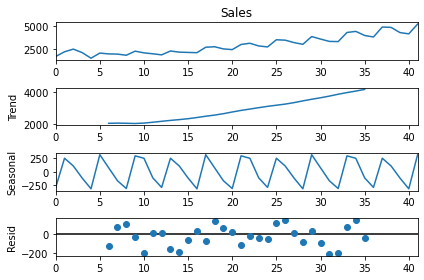

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(cola_data.Sales,period=12).plot()
plt.show()

In [5]:
cola_data['Quarter_ext'] = cola_data.Quarter.apply(lambda x : x.split('_')[0])
cola_data['Year'] = cola_data.Quarter.apply(lambda x : x.split('_')[1]).astype(int)

In [6]:
cola_data.head()

,Quarter,Sales,Quarter_ext,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


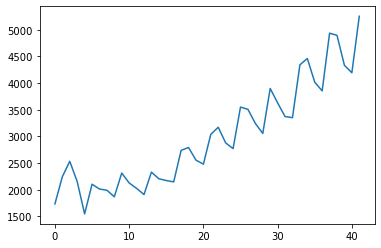

In [7]:
cola_data.Sales.plot()
plt.show()

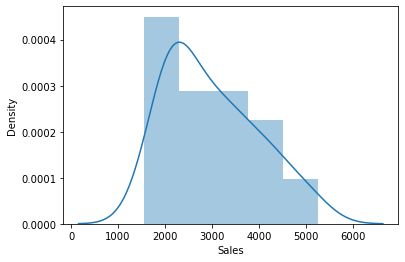

In [8]:
sns.distplot(cola_data.Sales)
plt.show()

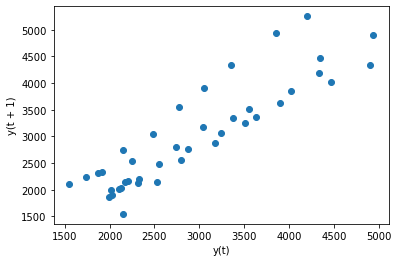

In [9]:
pd.plotting.lag_plot(cola_data.Sales)
plt.show()

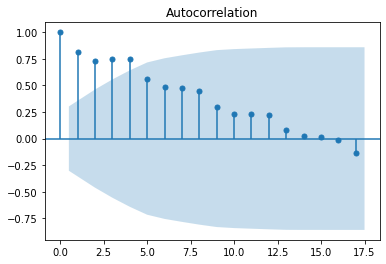

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cola_data.Sales)
plt.show()

In [11]:
quarter_df = pd.get_dummies(cola_data.Quarter_ext)

In [12]:
df = pd.concat([cola_data,quarter_df],axis = 1)

In [13]:
df['t'] = np.arange(1,43)
df['t_square'] = df['t']*df['t']
df['log_sales'] = np.log(df.Sales)

In [14]:
df

,Quarter,Sales,Quarter_ext,Year,Q1,Q2,Q3,Q4,t,t_square,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


### Model Building | Model Training | Model Testing

In [53]:
#splitting data
train = df.head(38)
test = df.tail(4)

In [54]:
#Linear Model

linear_model = smf.ols('Sales~t',data = train).fit()
pred_linear = linear_model.predict(test['t'])
rmse_linear = np.sqrt(np.mean(((test.Sales)-(pred_linear))**2))
rmse_linear

737.1568992951966

In [55]:
#Exponential

Exp = smf.ols('log_sales~t',data=train).fit()
pred_Exp = Exp.predict(test['t'])
rmse_Exp = np.sqrt(np.mean(((test['Sales'])-(np.exp(pred_Exp)))**2))
rmse_Exp

586.8646090003343

In [56]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=train).fit()
pred_Quad = Quad.predict(test[["t","t_square"]])
rmse_Quad = np.sqrt(np.mean(((test['Sales'])-(pred_Quad))**2))
rmse_Quad

445.8029895177929

In [57]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = add_sea.predict(test[['Q1','Q2','Q3','Q4']])
rmse_add_sea = np.sqrt(np.mean(((test['Sales'])-(pred_add_sea))**2))
rmse_add_sea

1931.3627904063205

In [58]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']])
rmse_add_sea_quad = np.sqrt(np.mean(((test['Sales'])-(pred_add_sea_quad))**2))
rmse_add_sea_quad

252.25576081760906

In [59]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = Mul_sea.predict(test)
rmse_Mult_sea = np.sqrt(np.mean(((test['Sales'])-(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2023.7328645103614

In [60]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

290.2684788886582

In [61]:
# comparing
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,737.156899
1,rmse_Exp,586.864609
2,rmse_Quad,445.802990
3,rmse_add_sea,1931.362790
4,rmse_add_sea_quad,252.255761
5,rmse_Mult_sea,2023.732865
6,rmse_Mult_add_sea,290.268479


#### OBSERVATION
* multiplicative additive seasonality gives the best prediction

### Predict for new data

In [25]:
new_data = pd.DataFrame({'Quarter_ext':['Q3','Q4','Q1','Q2']})
new_data

,Quarter_ext
0,Q3
1,Q4
2,Q1
3,Q2


In [26]:
new_data['t'] = np.arange(43,47)

In [27]:
new_data

,Quarter_ext,t
0,Q3,43
1,Q4,44
2,Q1,45
3,Q2,46


In [28]:
new_df = pd.get_dummies(new_data.Quarter_ext)

In [29]:
for_pred = pd.concat([new_data,new_df],axis=1)

In [30]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = df).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(for_pred))

In [31]:
for_pred["predicted_sales"] = pd.Series(np.exp(pred_Mult_add_sea))
new_var = pd.concat([df,for_pred])
new_var

,Quarter,Sales,Quarter_ext,Year,Q1,Q2,Q3,Q4,t,t_square,log_sales,predicted_sales
0,Q1_86,1734.827000,Q1,86.0,1,0,0,0,1,1.0,7.458663,NaN
1,Q2_86,2244.960999,Q2,86.0,0,1,0,0,2,4.0,7.716443,NaN
2,Q3_86,2533.804993,Q3,86.0,0,0,1,0,3,9.0,7.837477,NaN
3,Q4_86,2154.962997,Q4,86.0,0,0,0,1,4,16.0,7.675529,NaN
4,Q1_87,1547.818996,Q1,87.0,1,0,0,0,5,25.0,7.344602,NaN
5,Q2_87,2104.411995,Q2,87.0,0,1,0,0,6,36.0,7.651791,NaN
6,Q3_87,2014.362999,Q3,87.0,0,0,1,0,7,49.0,7.608058,NaN
7,Q4_87,1991.746998,Q4,87.0,0,0,0,1,8,64.0,7.596767,NaN
8,Q1_88,1869.049999,Q1,88.0,1,0,0,0,9,81.0,7.533186,NaN
9,Q2_88,2313.631996,Q2,88.0,0,1,0,0,10,100.0,7.746574,NaN


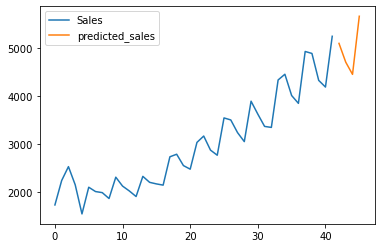

In [32]:
new_var[['Sales','predicted_sales']].reset_index(drop=True).plot()
plt.show()